<CENTER>
    <h1> Geospatial Data Science Applications: GEOG 4/590</h1>
    <h3>Jan 31, 2022</h3>
    <h2>Lecture 5: Machine learning</h2>
    <img src="images/coding-computer-programming.jpeg" width="300"/>
    <h3>Johnny Ryan: jryan4@uoregon.edu</h3>
</CENTER>

## Content of this lecture

* Crash course on machine learning for environmental applications 
<br>
<br>
* Introduce `scikit-learn` for machine learning in Python
<br>
<br>
* Learn how to represent data so a program can learn from it
<br>
<br>
* Learn how to evaluate a machine learning model
<br>
<br>
* Background for this week's lab

## What is machine learning?

* The goal of machine learning is use **input data** to make **useful predictions** on **never-before-seen data**


* Machine learning is **part** of artificial intelligence, but not the only part



<img src="images/ml_schematic.jpg" alt="https://vas3k.com/blog/machine_learning/" width="500"/>

## Input data

* Machine learning starts with a **labelled dataset**



* A **label** (or target variable) is the thing we're predicting (e.g. `y` variable in linear regression)



* For example, house price, river discharge, land cover etc.

## Input data

* It's tough to collect a good collection of data (time-consuming, expensive) 


* These datasets are therefore **extremely valuable**

<img src="images/captcha.jpeg" alt="https://onezero.medium.com/why-captcha-pictures-are-so-unbearably-depressing-20679b8cf84a" width="200"/>

## Features

* An input **variable** (e.g. the `x` variable in linear regression)


* A simple dataset might use a **one or two features** while a more complex dataset could have **thousands of features**


* In our river discharge example - features could include precipitation, snow depth, soil moisture


## Algorithms

* There are many (e.g. naive bayes, decision trees, neural network etc.)


* Performance of algorithm dependent on type of problem


* Just remember: **garage in, garbage out**

<img src="images/ml_types.jpg" alt="https://vas3k.com/blog/machine_learning/" width="600"/>

<img src="images/classical_ml.jpg" alt="https://vas3k.com/blog/machine_learning/" width="600"/>

## Supervised learning

* Training data is already **labeled** and we teach the machine to learn from these examples


* Supervised learning can used to predict a **category** (classification) or predict a **number** (regression) 

## Classification

* "Split things into **groups** based on their **features**"


* Examples include:
    * Land cover
    * Flood risk
    * Sentiment analysis


* Popular algorithms include:
    * Naive Bayes
    * Decision Trees
    * K-Nearest Neighbours
    * Support Vector Machine
    
<img src="images/classification.jpg" alt="https://vas3k.com/blog/machine_learning/" width="300"/>

## Regression

* "Draw a **line** through these dots"


* Used for predicting continuous variables:
    * River discharge
    * House prices
    * Weather forecasting
    

* Popular algorithms include linear regression, polynomial regression, + other algorithms
  
<img src="images/regression.jpeg" alt="https://vas3k.com/blog/machine_learning/" width="300"/>

## Unsupervised learning

* Labeled data is a luxury, sometimes we don't have it


* Sometimes we have **no idea** what the labels could be



* Much **less used** in geospatial data science but sometimes useful for exploratory analysis

## Clustering

* "Divide data into groups but machine chooses the best way"



* Common usages include:
    * image compression
    * labeling training data (i.e. for supervised learning)
    * detecting abnormal behavior
    
    
* Popular algorithms: 
    * K-means clustering
    * Mean-Shift
    * DBSCAN



    
    
<img src="images/clustering.jpeg" alt="https://vas3k.com/blog/machine_learning/" width="300"/>

<img src="images/kmeans.jpeg" alt="https://vas3k.com/blog/machine_learning/" width="600"/>

## Dimensionality reduction

* "Assemble specific features into higher-level ones"


* When we have too many features, some of which are useless


* Most popular algorithm is Principal Component Analysis (PCA)


<img src="images/pca.jpeg" alt="https://vas3k.com/blog/machine_learning/" width="300"/>

## Ensemble methods

* "Multiple learning algorithms learning to correct errors of each other"


* Often used improve the accuracy over what could be acheived with a single classical machine learning model.


* Popular algorithms: 
    * Random Forest
    * XGBoost
    
<img src="images/ensemble.jpeg" alt="https://vas3k.com/blog/machine_learning/" width="300"/>

## Bagging

* Apply the same algorithm but train it on different subsets of original data. At the end - just average the answers. Most famous example is **Random Forests**.



<img src="images/bagging.jpeg" alt="https://vas3k.com/blog/machine_learning/" width="600"/>



## Boosting

Similar to bagging but each subsequent algorithm is paying most attention to data points that were **mispredicted** by the previous one.

<img src="images/boosting.jpeg" alt="https://vas3k.com/blog/machine_learning/" width="600"/>


## Predicting house prices using `scikit-learn`

* The **California house price dataset** is a classic example dataset derived from the 1990 U.S. Census


* **Labels** = house prices at the block group level (a block group typically has a population of 600 to 3,000 people)


* **Features** = longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income




In [56]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Read dataset
df = pd.read_csv('data/california_house_prices.csv')

# Examine dataset (each row represents one block group)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,51,1905,291,707,284,6.2561,431000
1,51,1616,374,608,302,3.1932,400000
2,51,2413,431,1095,437,4.0089,357000
3,51,1502,243,586,231,4.3750,332400
4,51,2399,516,1160,514,3.8456,318900


## Check data

In [58]:
# Check for NaN values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15267 entries, 0 to 15266
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  15267 non-null  int64  
 1   total_rooms         15267 non-null  int64  
 2   total_bedrooms      15267 non-null  int64  
 3   population          15267 non-null  int64  
 4   households          15267 non-null  int64  
 5   median_income       15267 non-null  float64
 6   median_house_value  15267 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 835.0 KB


## Check data

In [59]:
# Check summary statistics
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15267.000000,15267.000000,15267.000000,15267.000000,15267.000000,15267.00000,15267.000000
mean,26.924805,2678.617214,549.977075,1476.071199,510.814371,3.70112,189416.617345
std,11.426288,2225.565198,430.964703,1180.890618,393.232807,1.57686,95681.349164
min,1.000000,2.000000,2.000000,3.000000,2.000000,0.49990,14999.000000
25%,17.000000,1469.000000,302.000000,814.000000,286.000000,2.53665,115400.000000
50%,27.000000,2142.000000,441.000000,1203.000000,415.000000,3.47840,171200.000000
75%,36.000000,3187.000000,661.000000,1780.000000,614.500000,4.62635,243050.000000
max,51.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.00010,499100.000000


## Visualize data

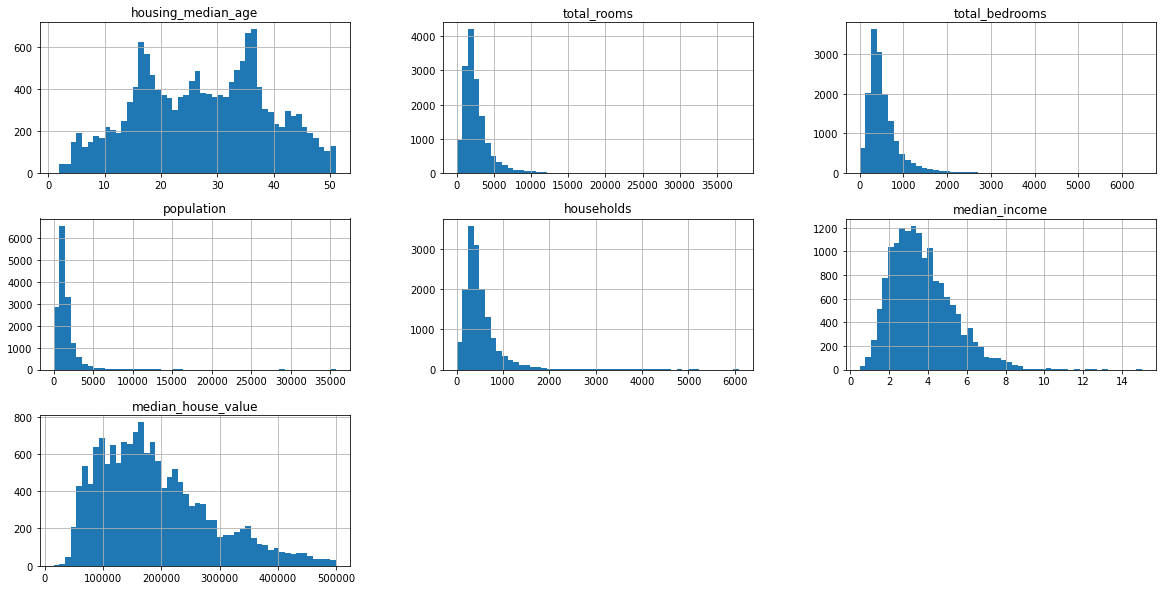

In [60]:
# Plot histogram
_ = df.hist(bins=50 , figsize=(20, 10))

## Correlation analysis

* It is always useful to compute correlation coeffcients (e.g.Pearson's r) between the labels (i.e. `median_house_value`) and features.

In [61]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display just house value correlations
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.668566
total_rooms           0.152923
households            0.098525
total_bedrooms        0.079023
population            0.020930
housing_median_age    0.014355
Name: median_house_value, dtype: float64

### Warning

* Just remember that correlation coefficients only measure linear correlations ("if `x` goes up, then `y` generally goes up/down").


* They may completely miss nonlinear relationships (e.g., "if `x` is close to zero then `y` generally goes up").



<img src="images/correlations.png" alt="https://www.kaggle.com/aakashjoshi123/o-reilly-solution-with-my-observations-notebook" width="600"/>

## Feature scaling

* Machine Learning algorithms don’t perform well when the input numerical attributes have very **different scales**.


* We often **scale** (or normalize) our features before training the model (e.g. min-max scaling or standardization).


* **Min-max method** scales values so that they end up ranging from 0 to 1


* **Standardization** scales values so that the they have mean of 0 and unit variance.


<img src="images/scaling.png" alt="https://www.kaggle.com/aakashjoshi123/o-reilly-solution-with-my-observations-notebook" width="800"/>

In [78]:
# Import library
from sklearn.preprocessing import StandardScaler

# Define feature list
feature_list =  ['housing_median_age', 'total_rooms', 'total_bedrooms', 
                 'population', 'households', 'median_income']

# Define features and labels 
X = df[feature_list]
y = df['median_house_value']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

## Split data in training and testing subsets


In [79]:
from sklearn.model_selection import train_test_split

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Multiple linear regression

A very simple supervised algorithm that fits a linear model to our data using a least squares approach. 



In [80]:
from sklearn.linear_model import LinearRegression

# Define model
lin_reg = LinearRegression()

# Fit model to data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [81]:
from sklearn.metrics import mean_squared_error

# Predict test labels
predictions = lin_reg.predict(X_test)

# Compute mean-squared-error
lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

64374.61617631897

(0.0, 500000.0)

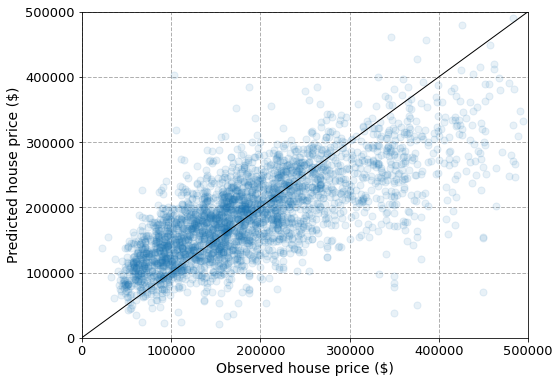

In [82]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

## Decision Tree

A popular machine learning algorithm that predicts a target variable using multiple regression trees

In [83]:
from sklearn.tree import DecisionTreeRegressor

# Define model
tree_reg = DecisionTreeRegressor()

# Fit model
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:
# Predict test labels
predictions = tree_reg.predict(X_test)

# Compute mean-squared-error
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

82289.76594673106

(0.0, 500000.0)

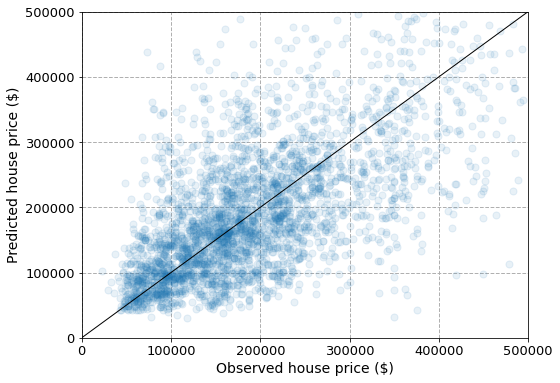

In [85]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

## RandomForests

A popular **ensemble algorithm** that fits a number of **decision tree classifiers** on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [91]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

60264.63679436083

(0.0, 500000.0)

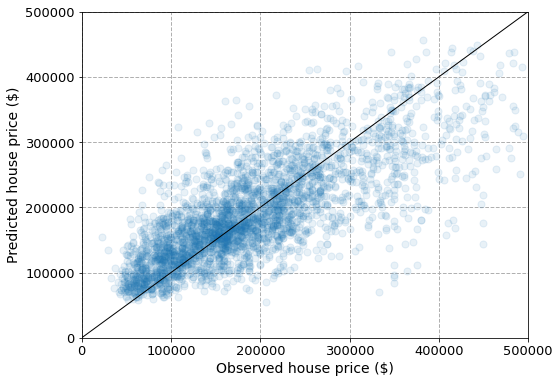

In [93]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)